<a href="https://colab.research.google.com/github/keerthi612004/EEG-Based-Schizophrenia-Detection-using-CycleGAN-Augmented-Scalograms/blob/main/Main_Project_CLEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DenseNet121-Real+Aug

Mounted at /content/drive
Real images: 3809
Real Train: 3047 | Real Test: 762
Generated images added to training: 3809
Train (after val split): 6171 | Val: 685 | Test: 762
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 77.7MB/s]



Training DenseNet121 with early stopping...


Epoch 1: 100%|██████████| 193/193 [14:01<00:00,  4.36s/it]


Epoch 1: Train Loss=0.2351 | Train Acc=89.42% | Val Loss=0.1269 | Val Acc=94.60%


Epoch 2: 100%|██████████| 193/193 [01:02<00:00,  3.08it/s]


Epoch 2: Train Loss=0.1092 | Train Acc=95.61% | Val Loss=0.6840 | Val Acc=86.86%


Epoch 3: 100%|██████████| 193/193 [01:02<00:00,  3.09it/s]


Epoch 3: Train Loss=0.0731 | Train Acc=97.15% | Val Loss=1.3601 | Val Acc=64.67%


Epoch 4: 100%|██████████| 193/193 [01:03<00:00,  3.02it/s]


Epoch 4: Train Loss=0.0631 | Train Acc=97.88% | Val Loss=0.0647 | Val Acc=97.66%


Epoch 5: 100%|██████████| 193/193 [01:04<00:00,  2.99it/s]


Epoch 5: Train Loss=0.0339 | Train Acc=98.67% | Val Loss=0.0858 | Val Acc=96.06%


Epoch 6: 100%|██████████| 193/193 [01:02<00:00,  3.10it/s]


Epoch 6: Train Loss=0.0350 | Train Acc=98.77% | Val Loss=0.2151 | Val Acc=94.16%


Epoch 7: 100%|██████████| 193/193 [01:03<00:00,  3.06it/s]


Epoch 7: Train Loss=0.0371 | Train Acc=98.75% | Val Loss=0.7784 | Val Acc=89.78%


Epoch 8: 100%|██████████| 193/193 [01:03<00:00,  3.04it/s]


Epoch 8: Train Loss=0.0321 | Train Acc=98.78% | Val Loss=1.0591 | Val Acc=84.82%


Epoch 9: 100%|██████████| 193/193 [01:04<00:00,  3.01it/s]


Epoch 9: Train Loss=0.0278 | Train Acc=98.98% | Val Loss=0.0588 | Val Acc=97.96%


Epoch 10: 100%|██████████| 193/193 [01:04<00:00,  3.00it/s]


Epoch 10: Train Loss=0.0099 | Train Acc=99.76% | Val Loss=0.1446 | Val Acc=95.33%


Epoch 11: 100%|██████████| 193/193 [01:02<00:00,  3.10it/s]


Epoch 11: Train Loss=0.0204 | Train Acc=99.27% | Val Loss=0.0764 | Val Acc=98.10%


Epoch 12: 100%|██████████| 193/193 [01:04<00:00,  3.01it/s]


Epoch 12: Train Loss=0.0144 | Train Acc=99.53% | Val Loss=0.0469 | Val Acc=98.54%


Epoch 13: 100%|██████████| 193/193 [01:03<00:00,  3.02it/s]


Epoch 13: Train Loss=0.0236 | Train Acc=99.32% | Val Loss=0.1232 | Val Acc=96.50%


Epoch 14: 100%|██████████| 193/193 [01:03<00:00,  3.02it/s]


Epoch 14: Train Loss=0.0074 | Train Acc=99.79% | Val Loss=0.0475 | Val Acc=98.39%


Epoch 15: 100%|██████████| 193/193 [01:03<00:00,  3.06it/s]


Epoch 15: Train Loss=0.0290 | Train Acc=99.04% | Val Loss=0.3277 | Val Acc=90.80%


Epoch 16: 100%|██████████| 193/193 [01:02<00:00,  3.09it/s]


Epoch 16: Train Loss=0.0104 | Train Acc=99.71% | Val Loss=0.0972 | Val Acc=97.81%


Epoch 17: 100%|██████████| 193/193 [01:03<00:00,  3.03it/s]


Epoch 17: Train Loss=0.0190 | Train Acc=99.38% | Val Loss=0.2528 | Val Acc=92.70%
Early stopping at epoch 17. Best Val Acc=98.54


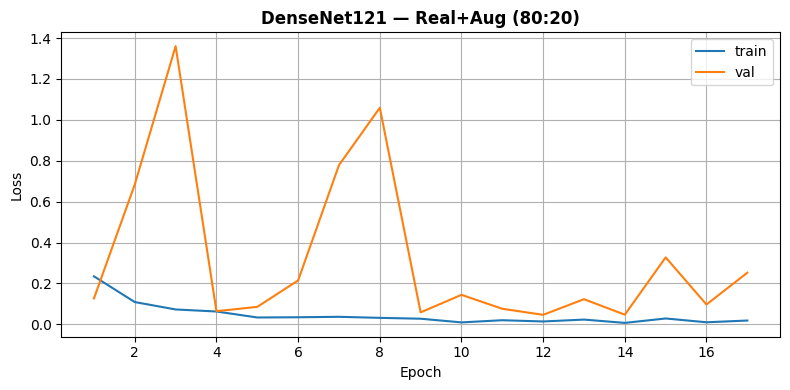

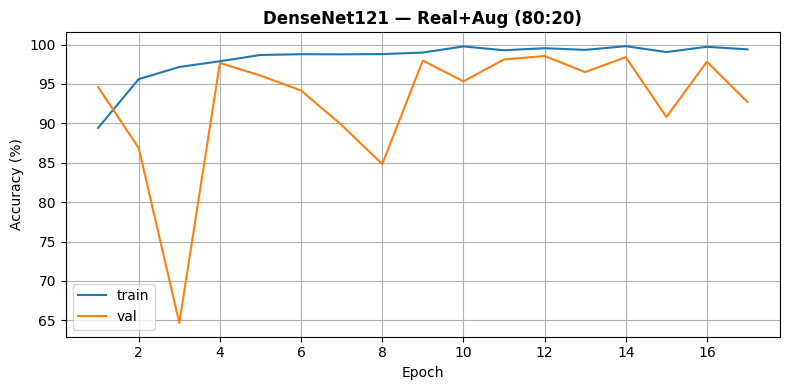


Evaluating on PURE REAL test set...


Testing: 100%|██████████| 24/24 [01:40<00:00,  4.20s/it]



Classification Report

               precision    recall  f1-score   support

Schizophrenia       0.97      0.98      0.98       405
      Healthy       0.97      0.97      0.97       357

     accuracy                           0.97       762
    macro avg       0.97      0.97      0.97       762
 weighted avg       0.97      0.97      0.97       762


Generalized accuracy: 0.974 ± 0.006   95% CI [0.962, 0.984]



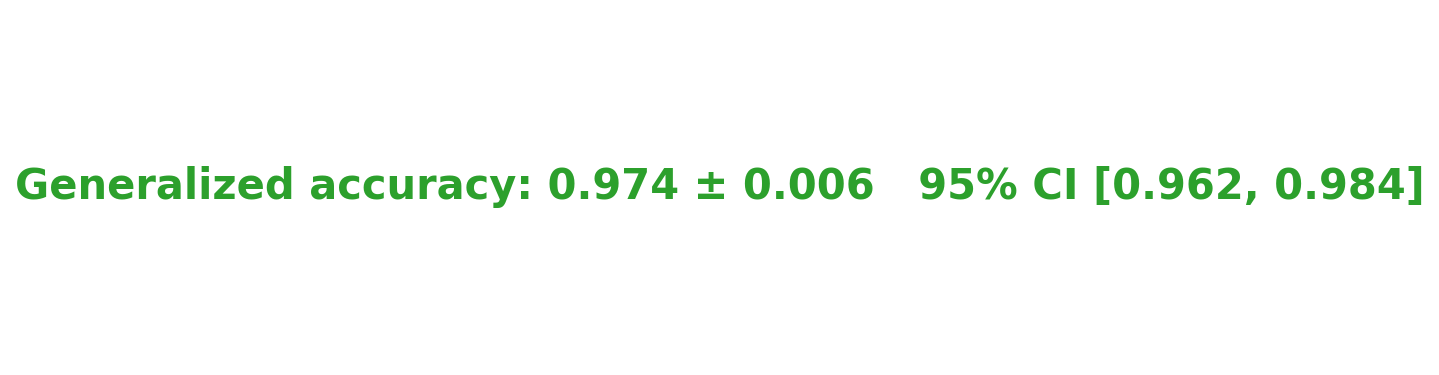

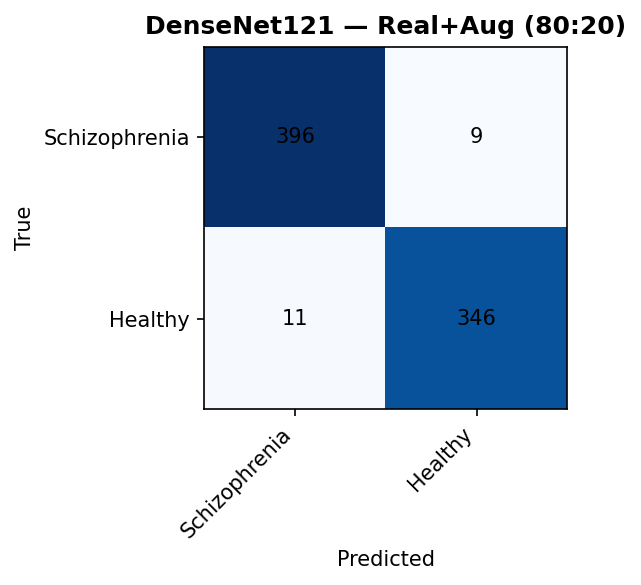

In [ ]:
import os, random, time
from glob import glob
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

real_dir = "/content/drive/MyDrive/MyDatasets/Real_data"
aug_dir  = "/content/drive/MyDrive/MyDatasets/Generated_Images"

CKPT_DIR  = "/content/drive/MyDrive/ModelOutputs/Model4/real+aug/checkpoints"
TRAIN_DIR = "/content/drive/MyDrive/ModelOutputs/Model4/real+aug/training"
TEST_DIR  = "/content/drive/MyDrive/ModelOutputs/Model4/real+aug/testing"
for d in [CKPT_DIR, TRAIN_DIR, TEST_DIR]:
    os.makedirs(d, exist_ok=True)

img_size   = (224, 224)
batch_size = 32
max_epochs = 50
early_stop_limit = 5
seed = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TITLE_STR = "DenseNet121 — Real+Aug (80:20)"

random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

real_images = []
for folder in sorted(os.listdir(real_dir)):
    p = os.path.join(real_dir, folder)
    if not os.path.isdir(p): continue
    label = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        real_images.append((f, label))

print(f"Real images: {len(real_images)}")
random.shuffle(real_images)
split_idx = int(0.8 * len(real_images))
real_train = real_images[:split_idx]
real_test  = real_images[split_idx:]
print(f"Real Train: {len(real_train)} | Real Test: {len(real_test)}")

gen_train = []
for folder in ["Healthy", "Schizophrenia"]:
    p = os.path.join(aug_dir, folder)
    if not os.path.isdir(p): continue
    label = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        gen_train.append((f, label))

print(f"Generated images added to training: {len(gen_train)}")
train_pool = real_train + gen_train
random.shuffle(train_pool)
val_ratio = 0.1
val_size = max(1, int(len(train_pool) * val_ratio))
val_images = train_pool[-val_size:]
train_images = train_pool[:-val_size]
print(f"Train (after val split): {len(train_images)} | Val: {len(val_images)} | Test: {len(real_test)}")

class ScalogramDataset(Dataset):
    def __init__(self, image_list, size):
        self.image_list = image_list
        self.transform = transforms.Compose([
            transforms.Resize(size),
            transforms.ToTensor(),
            transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
        ])

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        path, label = self.image_list[idx]
        img = Image.open(path).convert("RGB")
        return {
            "pixel_values": self.transform(img),
            "labels": torch.tensor(label, dtype=torch.long),
            "path": path
        }

def make_loader(items, shuffle):
    ds = ScalogramDataset(items, img_size)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle, num_workers=2, pin_memory=True)

train_loader = make_loader(train_images, True)
val_loader   = make_loader(val_images,  False)
test_loader  = make_loader(real_test,   False)

# === DenseNet121 model ===
model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
model.classifier = nn.Linear(model.classifier.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

hist = {"epoch": [], "train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
best_score = -np.inf
no_improve = 0

print("\nTraining DenseNet121 with early stopping...")
for epoch in range(1, max_epochs + 1):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch}"):
        x = batch["pixel_values"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)
        logits = model(x)
        loss = criterion(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (logits.argmax(1) == y).sum().item()
        total += y.size(0)

    train_loss = total_loss / max(1, len(train_loader))
    train_acc  = 100.0 * correct / max(1, total)

    model.eval()
    v_loss, v_correct, v_total = 0.0, 0, 0
    with torch.no_grad():
        for vb in val_loader:
            vx = vb["pixel_values"].to(device, non_blocking=True)
            vy = vb["labels"].to(device, non_blocking=True)
            v_logits = model(vx)
            v_loss += criterion(v_logits, vy).item()
            v_correct += (v_logits.argmax(1) == vy).sum().item()
            v_total += vy.size(0)
    val_loss = v_loss / max(1, len(val_loader))
    val_acc  = 100.0 * v_correct / max(1, v_total)
    monitor = val_acc

    hist["epoch"].append(epoch)
    hist["train_loss"].append(train_loss)
    hist["train_acc"].append(train_acc)
    hist["val_loss"].append(val_loss)
    hist["val_acc"].append(val_acc)

    print(f"Epoch {epoch}: Train Loss={train_loss:.4f} | Train Acc={train_acc:.2f}% | Val Loss={val_loss:.4f} | Val Acc={val_acc:.2f}%")

    if monitor > best_score:
        best_score = monitor
        no_improve = 0
        torch.save(model.state_dict(), os.path.join(CKPT_DIR, "DenseNet121_state_dict.pth"))
        torch.save(model,               os.path.join(CKPT_DIR, "DenseNet121_full_model.pt"))
    else:
        no_improve += 1
        if no_improve >= early_stop_limit:
            print(f"Early stopping at epoch {epoch}. Best Val Acc={best_score:.2f}")
            break

pd.DataFrame(hist).to_csv(os.path.join(TRAIN_DIR, "epoch_history.csv"), index=False)

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train")
plt.plot(hist["epoch"], hist["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.title(TITLE_STR, fontweight="bold")
plt.tight_layout(); plt.savefig(os.path.join(TRAIN_DIR, "train_loss.png"), dpi=150)
plt.show(); plt.close()

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_acc"], label="train")
plt.plot(hist["epoch"], hist["val_acc"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.grid(True); plt.legend()
plt.title(TITLE_STR, fontweight="bold")
plt.tight_layout(); plt.savefig(os.path.join(TRAIN_DIR, "train_acc.png"), dpi=150)
plt.show(); plt.close()

state = torch.load(os.path.join(CKPT_DIR, "DenseNet121_state_dict.pth"), map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

print("\nEvaluating on PURE REAL test set...")
y_true, y_pred, y_prob, img_paths = [], [], [], []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        x = batch["pixel_values"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)
        logits = model(x)
        probs = torch.softmax(logits, dim=1)[:, 1]
        preds = logits.argmax(1)
        y_true.extend(y.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())
        y_prob.extend(probs.cpu().tolist())
        img_paths.extend(batch["path"])

rep_text = classification_report(y_true, y_pred, target_names=["Schizophrenia", "Healthy"])
print("\nClassification Report\n")
print(rep_text)
rep_df = pd.DataFrame(
    classification_report(y_true, y_pred, target_names=["Schizophrenia", "Healthy"], output_dict=True, digits=4)
).transpose()
rep_df.to_csv(os.path.join(TEST_DIR, "classification_report.csv"))

def bootstrap_mean_acc(y_true, y_pred, iters=2000, seed=0):
    rng = np.random.default_rng(seed)
    y_true = np.array(y_true); y_pred = np.array(y_pred)
    n = len(y_true); idx = np.arange(n); accs = []
    for _ in range(iters):
        samp = rng.choice(idx, size=n, replace=True)
        accs.append((y_true[samp] == y_pred[samp]).mean())
    mean_acc = float(np.mean(accs))
    std_acc  = float(np.std(accs, ddof=1)) if n > 1 else 0.0
    ci_lo, ci_hi = float(np.percentile(accs, 2.5)), float(np.percentile(accs, 97.5))
    return mean_acc, std_acc, (ci_lo, ci_hi)

mean_acc, std_acc, (ci_lo, ci_hi) = bootstrap_mean_acc(y_true, y_pred)
ga_text = f"Generalized accuracy: {mean_acc:.3f} ± {std_acc:.3f}   95% CI [{ci_lo:.3f}, {ci_hi:.3f}]"
print("\n" + ga_text + "\n")

plt.figure(figsize=(10, 2.6), dpi=150)
plt.axis("off")
plt.text(0.5, 0.5, ga_text, ha="center", va="center", fontsize=20, fontweight="bold", color="tab:green")
plt.tight_layout()
ga_png_path = os.path.join(TEST_DIR, "generalized_accuracy_banner.png")
plt.savefig(ga_png_path, bbox_inches="tight", facecolor="white")
plt.show()

with open(os.path.join(TEST_DIR, "generalized_accuracy.txt"), "w") as f:
    f.write(f"mean_acc={mean_acc:.4f}, std={std_acc:.4f}, ci95=[{ci_lo:.4f},{ci_hi:.4f}]")

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.imshow(cm, cmap="Blues")
ax.set_title(TITLE_STR, fontweight="bold")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks([0, 1]); ax.set_xticklabels(["Schizophrenia", "Healthy"], rotation=45, ha="right")
ax.set_yticks([0, 1]); ax.set_yticklabels(["Schizophrenia", "Healthy"])
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha="center", va="center")
fig.tight_layout()
cm_path = os.path.join(TEST_DIR, "confusion_matrix.png")
fig.savefig(cm_path, bbox_inches="tight", facecolor="white")
plt.show(); plt.close(fig)

pd.DataFrame({"path": img_paths, "true": y_true, "pred": y_pred, "prob_SZ": y_prob}).to_csv(
    os.path.join(TEST_DIR, "test_predictions.csv"), index=False
)


Vit -Real+Aug

Mounted at /content/drive
Real images: 3809
Real Train: 3047 | Real Test: 762
Generated images added to training: 3809
Data summary -> real_total=3809, generated_total=3809, train_total=6856, test_total=762
Train (after val split): 6171 | Val: 685 | Test: 762


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training ViT with early stopping...


Epoch 1: 100%|██████████| 193/193 [03:08<00:00,  1.02it/s]


Epoch 1: Train Loss=0.6086 | Train Acc=64.88% | Val Loss=0.3999 | Val Acc=84.96%


Epoch 2: 100%|██████████| 193/193 [03:22<00:00,  1.05s/it]


Epoch 2: Train Loss=0.3819 | Train Acc=81.98% | Val Loss=0.4219 | Val Acc=79.56%


Epoch 3: 100%|██████████| 193/193 [03:08<00:00,  1.02it/s]


Epoch 3: Train Loss=0.3285 | Train Acc=85.04% | Val Loss=0.2315 | Val Acc=90.95%


Epoch 4: 100%|██████████| 193/193 [03:19<00:00,  1.03s/it]


Epoch 4: Train Loss=0.2419 | Train Acc=89.55% | Val Loss=0.4343 | Val Acc=77.23%


Epoch 5: 100%|██████████| 193/193 [03:08<00:00,  1.02it/s]


Epoch 5: Train Loss=0.2187 | Train Acc=90.46% | Val Loss=0.2234 | Val Acc=91.39%


Epoch 6: 100%|██████████| 193/193 [03:20<00:00,  1.04s/it]


Epoch 6: Train Loss=0.1589 | Train Acc=93.27% | Val Loss=0.2402 | Val Acc=89.64%


Epoch 7: 100%|██████████| 193/193 [03:08<00:00,  1.02it/s]


Epoch 7: Train Loss=0.1489 | Train Acc=93.87% | Val Loss=0.1251 | Val Acc=95.33%


Epoch 8: 100%|██████████| 193/193 [03:22<00:00,  1.05s/it]


Epoch 8: Train Loss=0.1059 | Train Acc=96.01% | Val Loss=0.1004 | Val Acc=95.91%


Epoch 9: 100%|██████████| 193/193 [03:20<00:00,  1.04s/it]


Epoch 9: Train Loss=0.0747 | Train Acc=97.18% | Val Loss=0.0407 | Val Acc=98.25%


Epoch 10: 100%|██████████| 193/193 [03:20<00:00,  1.04s/it]


Epoch 10: Train Loss=0.0862 | Train Acc=96.45% | Val Loss=0.1423 | Val Acc=94.01%


Epoch 11: 100%|██████████| 193/193 [03:08<00:00,  1.03it/s]


Epoch 11: Train Loss=0.0655 | Train Acc=97.70% | Val Loss=0.0784 | Val Acc=97.52%


Epoch 12: 100%|██████████| 193/193 [03:08<00:00,  1.03it/s]


Epoch 12: Train Loss=0.0549 | Train Acc=98.06% | Val Loss=0.1546 | Val Acc=94.31%


Epoch 13: 100%|██████████| 193/193 [03:08<00:00,  1.03it/s]


Epoch 13: Train Loss=0.0781 | Train Acc=96.86% | Val Loss=0.1187 | Val Acc=96.20%


Epoch 14: 100%|██████████| 193/193 [03:08<00:00,  1.02it/s]


Epoch 14: Train Loss=0.0475 | Train Acc=98.35% | Val Loss=0.1451 | Val Acc=94.60%
Early stopping at epoch 14. Best score=98.25


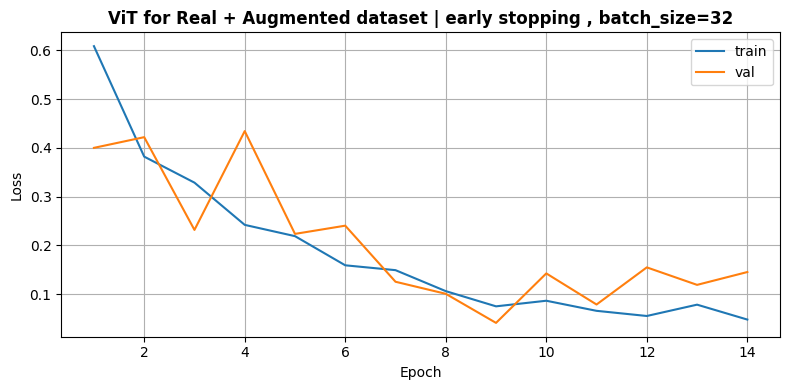

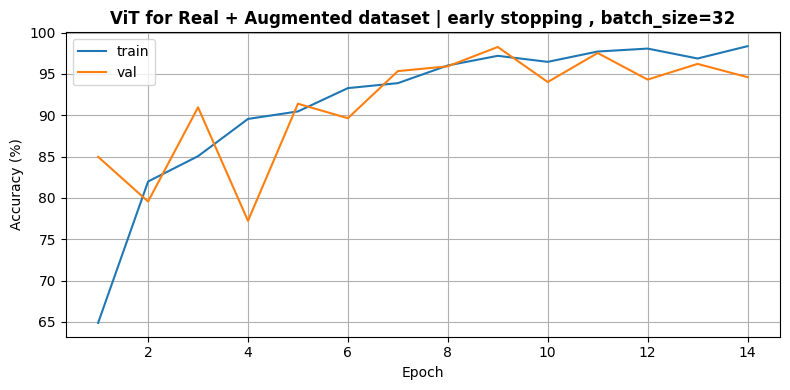


Evaluating on PURE REAL test set...


Testing: 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]



Classification Report (Real Only Test):
               precision    recall  f1-score   support

Schizophrenia       0.94      0.94      0.94       405
      Healthy       0.93      0.93      0.93       357

     accuracy                           0.93       762
    macro avg       0.93      0.93      0.93       762
 weighted avg       0.93      0.93      0.93       762


Generalized Accuracy: 0.931 ± 0.009 | 95% CI [0.912, 0.949]


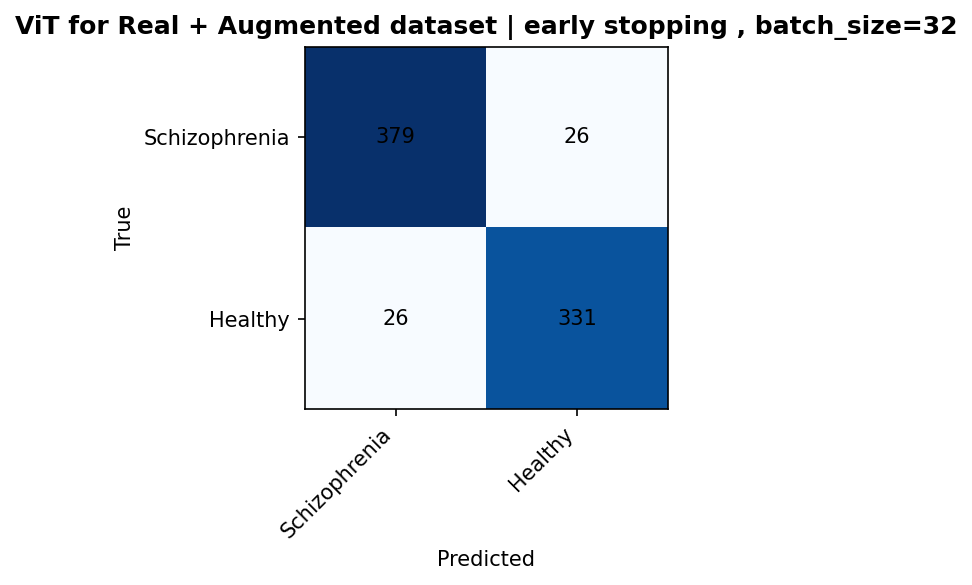

Confusion matrix saved at: /content/drive/MyDrive/ModelOutputs/Model1/real+aug/testing/confusion_matrix.png bytes: 37949


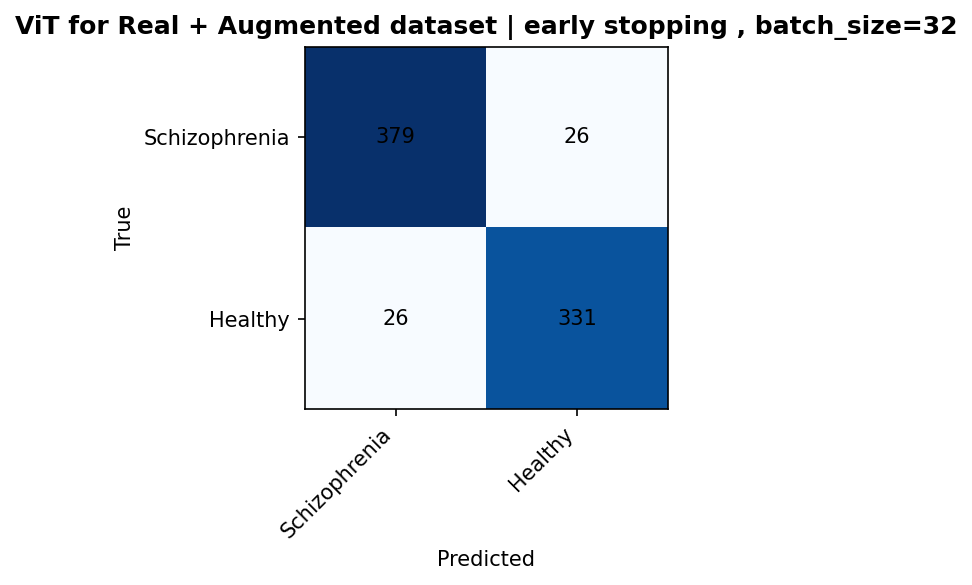

In [ ]:
import os, random, time
from glob import glob
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from transformers import ViTImageProcessor, ViTForImageClassification
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display

# Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Paths
real_dir = "/content/drive/MyDrive/MyDatasets/Real_data"
aug_dir  = "/content/drive/MyDrive/MyDatasets/Generated_Images"  # train only

CKPT_DIR  = "/content/drive/MyDrive/ModelOutputs/Model1/real+aug/checkpoints"
TRAIN_DIR = "/content/drive/MyDrive/ModelOutputs/Model1/real+aug/training"
TEST_DIR  = "/content/drive/MyDrive/ModelOutputs/Model1/real+aug/testing"
for d in [CKPT_DIR, TRAIN_DIR, TEST_DIR]:
    os.makedirs(d, exist_ok=True)

# Config
img_size   = (224, 224)
batch_size = 32
max_epochs = 50
patience   = 5
seed       = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TITLE_STR = "ViT for Real + Augmented dataset | early stopping , batch_size=32"

random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Collect real images
real_images = []
for folder in sorted(os.listdir(real_dir)):
    p = os.path.join(real_dir, folder)
    if not os.path.isdir(p):
        continue
    label = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        real_images.append((f, label))
print(f"Real images: {len(real_images)}")

# Split real 80:20
random.shuffle(real_images)
split_idx = int(0.8 * len(real_images))
real_train = real_images[:split_idx]
real_test  = real_images[split_idx:]
print(f"Real Train: {len(real_train)} | Real Test: {len(real_test)}")

# Generated images for training only
gen_train = []
for folder in ["Healthy", "Schizophrenia"]:
    p = os.path.join(aug_dir, folder)
    if not os.path.isdir(p):
        continue
    label = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        gen_train.append((f, label))
print(f"Generated images added to training: {len(gen_train)}")
print(f"Data summary -> real_total={len(real_images)}, generated_total={len(gen_train)}, "
      f"train_total={len(real_train)+len(gen_train)}, test_total={len(real_test)}")

# Train pool and validation split for early stopping
train_pool = real_train + gen_train
random.shuffle(train_pool)
val_ratio = 0.1
val_size = max(1, int(len(train_pool) * val_ratio)) if len(train_pool) > 0 else 0
val_images = train_pool[-val_size:] if val_size > 0 else []
train_images = train_pool[:-val_size] if val_size > 0 else train_pool
print(f"Train (after val split): {len(train_images)} | Val: {len(val_images)} | Test: {len(real_test)}")

# Dataset
class ScalogramDataset(Dataset):
    def __init__(self, image_list, processor, size):
        self.image_list = image_list
        self.processor = processor
        self.size = size
    def __len__(self):
        return len(self.image_list)
    def __getitem__(self, idx):
        path, label = self.image_list[idx]
        img = Image.open(path).convert("RGB").resize(self.size)
        proc = self.processor(images=img, return_tensors="pt")
        return {
            "pixel_values": proc["pixel_values"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
            "path": path
        }

# Load processor and dataloaders
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

def make_loader(items, shuffle):
    if items is None or len(items) == 0:
        return None
    ds = ScalogramDataset(items, processor, img_size)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle, num_workers=2, pin_memory=True)

train_loader = make_loader(train_images, True)
val_loader   = make_loader(val_images,  False)
test_loader  = make_loader(real_test,   False)

# Model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=2,
    ignore_mismatched_sizes=True
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

# Train with early stopping
hist = {"epoch": [], "train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
best_score = -np.inf
no_improve = 0

print("\nTraining ViT with early stopping...")
for epoch in range(1, max_epochs + 1):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch}"):
        x = batch["pixel_values"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)

        logits = model(pixel_values=x).logits
        loss = criterion(logits, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (logits.argmax(1) == y).sum().item()
        total += y.size(0)

    train_loss = total_loss / max(1, len(train_loader))
    train_acc  = 100.0 * correct / max(1, total)

    if val_loader is not None:
        model.eval()
        v_loss, v_correct, v_total = 0.0, 0, 0
        with torch.no_grad():
            for vb in val_loader:
                vx = vb["pixel_values"].to(device, non_blocking=True)
                vy = vb["labels"].to(device, non_blocking=True)
                v_logits = model(pixel_values=vx).logits
                v_loss += criterion(v_logits, vy).item()
                v_correct += (v_logits.argmax(1) == vy).sum().item()
                v_total += vy.size(0)
        val_loss = v_loss / max(1, len(val_loader))
        val_acc  = 100.0 * v_correct / max(1, v_total)
        monitor = val_acc
    else:
        val_loss, val_acc = float("nan"), float("nan")
        monitor = train_acc

    hist["epoch"].append(epoch)
    hist["train_loss"].append(train_loss)
    hist["train_acc"].append(train_acc)
    hist["val_loss"].append(val_loss)
    hist["val_acc"].append(val_acc)

    print(f"Epoch {epoch}: Train Loss={train_loss:.4f} | Train Acc={train_acc:.2f}%"
          + (f" | Val Loss={val_loss:.4f} | Val Acc={val_acc:.2f}%" if val_loader else ""))

    if monitor > best_score:
        best_score = monitor
        no_improve = 0
        torch.save(model.state_dict(), os.path.join(CKPT_DIR, "ViT_state_dict.pth"))
        torch.save(model,               os.path.join(CKPT_DIR, "ViT_full_model.pt"))
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"Early stopping at epoch {epoch}. Best score={best_score:.2f}")
            break

# Training curves
pd.DataFrame(hist).to_csv(os.path.join(TRAIN_DIR, "epoch_history.csv"), index=False)

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train")
if not np.isnan(hist["val_loss"]).all():
    plt.plot(hist["epoch"], hist["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.title(TITLE_STR, fontweight="bold")
plt.tight_layout(); plt.savefig(os.path.join(TRAIN_DIR, "train_loss.png"), dpi=150)
plt.show(); plt.close()

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_acc"], label="train")
if not np.isnan(hist["val_acc"]).all():
    plt.plot(hist["epoch"], hist["val_acc"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.grid(True); plt.legend()
plt.title(TITLE_STR, fontweight="bold")
plt.tight_layout(); plt.savefig(os.path.join(TRAIN_DIR, "train_acc.png"), dpi=150)
plt.show(); plt.close()

# Load best for testing
state = torch.load(os.path.join(CKPT_DIR, "ViT_state_dict.pth"), map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

# Evaluate on real test
print("\nEvaluating on PURE REAL test set...")
y_true, y_pred, y_prob, img_paths = [], [], [], []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        x = batch["pixel_values"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)
        logits = model(pixel_values=x).logits
        probs = torch.softmax(logits, dim=1)[:, 1]
        preds = logits.argmax(1)

        y_true.extend(y.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())
        y_prob.extend(probs.cpu().tolist())
        img_paths.extend(batch["path"])

print("\nClassification Report (Real Only Test):")
rep_text = classification_report(y_true, y_pred, target_names=["Schizophrenia", "Healthy"])
print(rep_text)

rep_df = pd.DataFrame(
    classification_report(
        y_true, y_pred, target_names=["Schizophrenia", "Healthy"], output_dict=True, digits=4
    )
).transpose()
rep_df.to_csv(os.path.join(TEST_DIR, "classification_report.csv"))

# Generalized accuracy mean +- std with 95% CI
def bootstrap_mean_acc(y_true, y_pred, iters=2000, seed=0):
    rng = np.random.default_rng(seed)
    y_true = np.array(y_true); y_pred = np.array(y_pred)
    n = len(y_true); idx = np.arange(n); accs = []
    for _ in range(iters):
        samp = rng.choice(idx, size=n, replace=True)
        accs.append((y_true[samp] == y_pred[samp]).mean())
    mean_acc = float(np.mean(accs))
    std_acc  = float(np.std(accs, ddof=1)) if n > 1 else 0.0
    ci_lo, ci_hi = float(np.percentile(accs, 2.5)), float(np.percentile(accs, 97.5))
    return mean_acc, std_acc, (ci_lo, ci_hi)

mean_acc, std_acc, (ci_lo, ci_hi) = bootstrap_mean_acc(y_true, y_pred)
print(f"\nGeneralized Accuracy: {mean_acc:.3f} ± {std_acc:.3f} | 95% CI [{ci_lo:.3f}, {ci_hi:.3f}]")
with open(os.path.join(TEST_DIR, "generalized_accuracy.txt"), "w") as f:
    f.write(f"mean_acc={mean_acc:.4f}, std={std_acc:.4f}, ci95=[{ci_lo:.4f},{ci_hi:.4f}]")

# Confusion matrix (save first, then show)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
im = ax.imshow(cm, cmap="Blues")
ax.set_title(TITLE_STR, fontweight="bold")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks([0, 1]); ax.set_xticklabels(["Schizophrenia", "Healthy"], rotation=45, ha="right")
ax.set_yticks([0, 1]); ax.set_yticklabels(["Schizophrenia", "Healthy"])
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha="center", va="center")
fig.tight_layout()
cm_path = os.path.join(TEST_DIR, "confusion_matrix.png")
fig.savefig(cm_path, bbox_inches="tight", facecolor="white")
plt.show(); plt.close(fig)

# Quick read-back preview in Colab to confirm the PNG is not blank
print("Confusion matrix saved at:", cm_path, "bytes:", os.path.getsize(cm_path))
display(Image.open(cm_path))

pd.DataFrame({
    "path": img_paths,
    "true": y_true,
    "pred": y_pred,
    "prob_SZ": y_prob
}).to_csv(os.path.join(TEST_DIR, "test_predictions.csv"), index=False)


In [ ]:
import os, random, time
from glob import glob
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

real_dir = "/content/drive/MyDrive/MyDatasets/Real_data"
aug_dir  = "/content/drive/MyDrive/MyDatasets/Generated_Images"

CKPT_DIR  = "/content/drive/MyDrive/ModelOutputs/Model4/real+aug/checkpoints"
TRAIN_DIR = "/content/drive/MyDrive/ModelOutputs/Model4/real+aug/training"
TEST_DIR  = "/content/drive/MyDrive/ModelOutputs/Model4/real+aug/testing"
for d in [CKPT_DIR, TRAIN_DIR, TEST_DIR]:
    os.makedirs(d, exist_ok=True)

img_size   = (224, 224)
batch_size = 32
max_epochs = 50
early_stop_limit = 5
seed = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TITLE_STR = "DenseNet121 — Real+Aug (80:20)"

random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

real_images = []
for folder in sorted(os.listdir(real_dir)):
    p = os.path.join(real_dir, folder)
    if not os.path.isdir(p): continue
    label = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        real_images.append((f, label))

print(f"Real images: {len(real_images)}")
random.shuffle(real_images)
split_idx = int(0.8 * len(real_images))
real_train = real_images[:split_idx]
real_test  = real_images[split_idx:]
print(f"Real Train: {len(real_train)} | Real Test: {len(real_test)}")

gen_train = []
for folder in ["Healthy", "Schizophrenia"]:
    p = os.path.join(aug_dir, folder)
    if not os.path.isdir(p): continue
    label = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        gen_train.append((f, label))

print(f"Generated images added to training: {len(gen_train)}")
train_pool = real_train + gen_train
random.shuffle(train_pool)
val_ratio = 0.1
val_size = max(1, int(len(train_pool) * val_ratio))
val_images = train_pool[-val_size:]
train_images = train_pool[:-val_size]
print(f"Train (after val split): {len(train_images)} | Val: {len(val_images)} | Test: {len(real_test)}")

class ScalogramDataset(Dataset):
    def _init_(self, image_list, size):
        self.image_list = image_list
        self.transform = transforms.Compose([
            transforms.Resize(size),
            transforms.ToTensor(),
            transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
        ])
    def _len_(self): return len(self.image_list)
    def _getitem_(self, idx):
        path, label = self.image_list[idx]
        img = Image.open(path).convert("RGB")
        return {
            "pixel_values": self.transform(img),
            "labels": torch.tensor(label, dtype=torch.long),
            "path": path
        }

def make_loader(items, shuffle):
    ds = ScalogramDataset(items, img_size)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle, num_workers=2, pin_memory=True)

train_loader = make_loader(train_images, True)
val_loader   = make_loader(val_images,  False)
test_loader  = make_loader(real_test,   False)

# === DenseNet121 model ===
model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
model.classifier = nn.Linear(model.classifier.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

hist = {"epoch": [], "train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
best_score = -np.inf
no_improve = 0

print("\nTraining DenseNet121 with early stopping...")
for epoch in range(1, max_epochs + 1):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch}"):
        x = batch["pixel_values"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)
        logits = model(x)
        loss = criterion(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (logits.argmax(1) == y).sum().item()
        total += y.size(0)

    train_loss = total_loss / max(1, len(train_loader))
    train_acc  = 100.0 * correct / max(1, total)

    model.eval()
    v_loss, v_correct, v_total = 0.0, 0, 0
    with torch.no_grad():
        for vb in val_loader:
            vx = vb["pixel_values"].to(device, non_blocking=True)
            vy = vb["labels"].to(device, non_blocking=True)
            v_logits = model(vx)
            v_loss += criterion(v_logits, vy).item()
            v_correct += (v_logits.argmax(1) == vy).sum().item()
            v_total += vy.size(0)
    val_loss = v_loss / max(1, len(val_loader))
    val_acc  = 100.0 * v_correct / max(1, v_total)
    monitor = val_acc

    hist["epoch"].append(epoch)
    hist["train_loss"].append(train_loss)
    hist["train_acc"].append(train_acc)
    hist["val_loss"].append(val_loss)
    hist["val_acc"].append(val_acc)

    print(f"Epoch {epoch}: Train Loss={train_loss:.4f} | Train Acc={train_acc:.2f}% | Val Loss={val_loss:.4f} | Val Acc={val_acc:.2f}%")

    if monitor > best_score:
        best_score = monitor
        no_improve = 0
        torch.save(model.state_dict(), os.path.join(CKPT_DIR, "DenseNet121_state_dict.pth"))
        torch.save(model,               os.path.join(CKPT_DIR, "DenseNet121_full_model.pt"))
    else:
        no_improve += 1
        if no_improve >= early_stop_limit:
            print(f"Early stopping at epoch {epoch}. Best Val Acc={best_score:.2f}")
            break

pd.DataFrame(hist).to_csv(os.path.join(TRAIN_DIR, "epoch_history.csv"), index=False)

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train")
plt.plot(hist["epoch"], hist["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.title(TITLE_STR, fontweight="bold")
plt.tight_layout(); plt.savefig(os.path.join(TRAIN_DIR, "train_loss.png"), dpi=150)
plt.show(); plt.close()

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_acc"], label="train")
plt.plot(hist["epoch"], hist["val_acc"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.grid(True); plt.legend()
plt.title(TITLE_STR, fontweight="bold")
plt.tight_layout(); plt.savefig(os.path.join(TRAIN_DIR, "train_acc.png"), dpi=150)
plt.show(); plt.close()

state = torch.load(os.path.join(CKPT_DIR, "DenseNet121_state_dict.pth"), map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

print("\nEvaluating on PURE REAL test set...")
y_true, y_pred, y_prob, img_paths = [], [], [], []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        x = batch["pixel_values"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)
        logits = model(x)
        probs = torch.softmax(logits, dim=1)[:, 1]
        preds = logits.argmax(1)
        y_true.extend(y.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())
        y_prob.extend(probs.cpu().tolist())
        img_paths.extend(batch["path"])

rep_text = classification_report(y_true, y_pred, target_names=["Schizophrenia", "Healthy"])
print("\nClassification Report\n")
print(rep_text)
rep_df = pd.DataFrame(
    classification_report(y_true, y_pred, target_names=["Schizophrenia", "Healthy"], output_dict=True, digits=4)
).transpose()
rep_df.to_csv(os.path.join(TEST_DIR, "classification_report.csv"))

def bootstrap_mean_acc(y_true, y_pred, iters=2000, seed=0):
    rng = np.random.default_rng(seed)
    y_true = np.array(y_true); y_pred = np.array(y_pred)
    n = len(y_true); idx = np.arange(n); accs = []
    for _ in range(iters):
        samp = rng.choice(idx, size=n, replace=True)
        accs.append((y_true[samp] == y_pred[samp]).mean())
    mean_acc = float(np.mean(accs))
    std_acc  = float(np.std(accs, ddof=1)) if n > 1 else 0.0
    ci_lo, ci_hi = float(np.percentile(accs, 2.5)), float(np.percentile(accs, 97.5))
    return mean_acc, std_acc, (ci_lo, ci_hi)

mean_acc, std_acc, (ci_lo, ci_hi) = bootstrap_mean_acc(y_true, y_pred)
ga_text = f"Generalized accuracy: {mean_acc:.3f} ± {std_acc:.3f}   95% CI [{ci_lo:.3f}, {ci_hi:.3f}]"
print("\n" + ga_text + "\n")

plt.figure(figsize=(10, 2.6), dpi=150)
plt.axis("off")
plt.text(0.5, 0.5, ga_text, ha="center", va="center", fontsize=20, fontweight="bold", color="tab:green")
plt.tight_layout()
ga_png_path = os.path.join(TEST_DIR, "generalized_accuracy_banner.png")
plt.savefig(ga_png_path, bbox_inches="tight", facecolor="white")
plt.show()

with open(os.path.join(TEST_DIR, "generalized_accuracy.txt"), "w") as f:
    f.write(f"mean_acc={mean_acc:.4f}, std={std_acc:.4f}, ci95=[{ci_lo:.4f},{ci_hi:.4f}]")

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.imshow(cm, cmap="Blues")
ax.set_title(TITLE_STR, fontweight="bold")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks([0, 1]); ax.set_xticklabels(["Schizophrenia", "Healthy"], rotation=45, ha="right")
ax.set_yticks([0, 1]); ax.set_yticklabels(["Schizophrenia", "Healthy"])
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha="center", va="center")
fig.tight_layout()
cm_path = os.path.join(TEST_DIR, "confusion_matrix.png")
fig.savefig(cm_path, bbox_inches="tight", facecolor="white")
plt.show(); plt.close(fig)

pd.DataFrame({"path": img_paths, "true": y_true, "pred": y_pred, "prob_SZ": y_prob}).to_csv(
    os.path.join(TEST_DIR, "test_predictions.csv"), index=False
)

Mounted at /content/drive
Real images: 3809
Real Train: 3047 | Real Test: 762
Generated images added to training: 3809
Train (after val split): 6171 | Val: 685 | Test: 762


TypeError: ScalogramDataset() takes no arguments

DenseNet121-real dataset only(overfitting resolved somehow using (adamW,lable smoothing,reduceLRon plateau)

In [ ]:
import os, random
from glob import glob
from datetime import datetime
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models, transforms
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

real_dir = "/content/drive/MyDrive/MyDatasets/Real_Images"

ROOT = "/content/drive/MyDrive/ModelOutputs/Model2/real_only"
CKPT_DIR  = os.path.join(ROOT, "checkpoints")
TRAIN_DIR = os.path.join(ROOT, "training")
TEST_DIR  = os.path.join(ROOT, "testing")
for d in [CKPT_DIR, TRAIN_DIR, TEST_DIR]:
    os.makedirs(d, exist_ok=True)

img_size   = (224, 224)
batch_size = 32
max_epochs = 50
patience   = 5
seed       = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TITLE_STR = "DenseNet121 Real 80:20"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")

random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = True

all_paths, all_labels = [], []
for folder in sorted(os.listdir(real_dir)):
    p = os.path.join(real_dir, folder)
    if not os.path.isdir(p): continue
    y = 0 if folder.lower().startswith("s") else 1
    for f in glob(os.path.join(p, "*.png")):
        all_paths.append(f); all_labels.append(y)
print(f"Total real images: {len(all_paths)}")

tr_paths, te_paths, tr_labels, te_labels = train_test_split(
    all_paths, all_labels, test_size=0.2, random_state=seed, stratify=all_labels
)
print(f"Train real: {len(tr_paths)} | Test real: {len(te_paths)}")

class ScalogramDataset(Dataset):
    def __init__(self, paths, labels, mode="train"):
        self.paths = paths
        self.labels = labels
        if mode == "train":
            self.transform = transforms.Compose([
                transforms.Resize(img_size),
                transforms.RandomResizedCrop(img_size, scale=(0.9, 1.0)),
                transforms.ColorJitter(brightness=0.08, contrast=0.08, saturation=0.08, hue=0.02),
                transforms.ToTensor(),
                transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize(img_size),
                transforms.ToTensor(),
                transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
            ])
    def __len__(self): return len(self.paths)
    def __getitem__(self, idx):
        path = self.paths[idx]; y = int(self.labels[idx])
        img = Image.open(path).convert("RGB")
        return {"img": self.transform(img), "label": torch.tensor(y, dtype=torch.long), "path": path}

train_pool_ds = ScalogramDataset(tr_paths, tr_labels, mode="train")
val_len = max(1, int(len(train_pool_ds)*0.1)) if len(train_pool_ds)>=10 else 0
if val_len>0:
    train_len = len(train_pool_ds) - val_len
    train_ds, val_ds = random_split(train_pool_ds, [train_len, val_len],
                                    generator=torch.Generator().manual_seed(seed))
else:
    train_ds, val_ds = train_pool_ds, None
test_ds = ScalogramDataset(te_paths, te_labels, mode="eval")

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True) if val_ds else None
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

model = models.densenet121(pretrained=True)
in_feats = model.classifier.in_features
model.classifier = nn.Linear(in_feats, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

hist = {"epoch": [], "train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
best_val = float("inf")
no_improve = 0

print("\nTraining DenseNet121...")
for epoch in range(1, max_epochs+1):
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch}"):
        x = batch["img"].to(device, non_blocking=True)
        y = batch["label"].to(device, non_blocking=True)

        logits = model(x)
        loss = criterion(logits, y)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        tr_loss += loss.item() * x.size(0)
        tr_correct += (logits.argmax(1) == y).sum().item()
        tr_total += y.size(0)

    train_loss = tr_loss / tr_total
    train_acc  = 100.0 * tr_correct / tr_total

    if val_loader:
        model.eval()
        va_loss, va_correct, va_total = 0.0, 0, 0
        with torch.no_grad():
            for vb in val_loader:
                vx = vb["img"].to(device, non_blocking=True)
                vy = vb["label"].to(device, non_blocking=True)
                v_logits = model(vx)
                va_loss += criterion(v_logits, vy).item() * vx.size(0)
                va_correct += (v_logits.argmax(1) == vy).sum().item()
                va_total += vy.size(0)
        val_loss = va_loss / va_total
        val_acc  = 100.0 * va_correct / va_total
        scheduler.step(val_loss)
    else:
        val_loss, val_acc = float("nan"), float("nan")

    hist["epoch"].append(epoch)
    hist["train_loss"].append(train_loss)
    hist["train_acc"].append(train_acc)
    hist["val_loss"].append(val_loss)
    hist["val_acc"].append(val_acc)

    print(f"Epoch {epoch}: Train Loss={train_loss:.4f} | Train Acc={train_acc:.2f}% | Val Loss={val_loss:.4f} | Val Acc={val_acc:.2f}%")

    improved = not np.isnan(val_loss) and (val_loss < best_val - 1e-6)
    if improved:
        best_val = val_loss
        no_improve = 0
        torch.save(model.state_dict(), os.path.join(CKPT_DIR, f"DenseNet121_state_real_{ts}.pth"))
        torch.save(model,               os.path.join(CKPT_DIR, f"DenseNet121_full_real_{ts}.pt"))
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

pd.DataFrame(hist).to_csv(os.path.join(TRAIN_DIR, f"epoch_history_real_{ts}.csv"), index=False)

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train")
if not np.isnan(np.array(hist["val_loss"])).all():
    plt.plot(hist["epoch"], hist["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.title(TITLE_STR); plt.tight_layout()
plt.savefig(os.path.join(TRAIN_DIR, f"train_loss_real_{ts}.png"), dpi=150); plt.close()

plt.figure(figsize=(8,4))
plt.plot(hist["epoch"], hist["train_acc"], label="train")
if not np.isnan(np.array(hist["val_acc"])).all():
    plt.plot(hist["epoch"], hist["val_acc"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.grid(True); plt.legend()
plt.title(TITLE_STR); plt.tight_layout()
plt.savefig(os.path.join(TRAIN_DIR, f"train_acc_real_{ts}.png"), dpi=150); plt.close()

state_path = sorted(glob(os.path.join(CKPT_DIR, f"DenseNet121_state_real_{ts}.pth")))[0]
model.load_state_dict(torch.load(state_path, map_location=device))
model.eval()

print("\nEvaluating on PURE REAL test set...")
y_true, y_pred, y_prob, img_paths = [], [], [], []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        x = batch["img"].to(device, non_blocking=True)
        y = batch["label"].to(device, non_blocking=True)
        logits = model(x)
        probs = torch.softmax(logits, dim=1)[:, 1]
        preds = logits.argmax(1)

        y_true.extend(y.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())
        y_prob.extend(probs.cpu().tolist())
        img_paths.extend(batch["path"])

rep_df = pd.DataFrame(
    classification_report(y_true, y_pred, target_names=["Schizophrenia","Healthy"], output_dict=True, digits=4)
).transpose()
rep_df.to_csv(os.path.join(TEST_DIR, f"classification_report_real_{ts}.csv"))

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
plt.figure(figsize=(5,4), dpi=150)
plt.imshow(cm, cmap="Blues")
plt.title(TITLE_STR); plt.xlabel("Predicted"); plt.ylabel("True")
plt.xticks([0,1], ["Schizophrenia","Healthy"]); plt.yticks([0,1], ["Schizophrenia","Healthy"])
for (i,j),v in np.ndenumerate(cm): plt.text(j,i,str(v),ha="center",va="center")
plt.tight_layout()
plt.savefig(os.path.join(TEST_DIR, f"confusion_matrix_real_{ts}.png"), dpi=150); plt.close()

pd.DataFrame({"path": img_paths, "true": y_true, "pred": y_pred, "prob_SZ": y_prob}) \
  .to_csv(os.path.join(TEST_DIR, f"test_predictions_real_{ts}.csv"), index=False)

print("Saved outputs to:", ROOT)


Mounted at /content/drive
Total real images: 3810
Train real: 3048 | Test real: 762
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 30.8M/30.8M [00:00<00:00, 206MB/s]



Training DenseNet121...


Epoch 1: 100%|██████████| 86/86 [16:15<00:00, 11.35s/it]


Epoch 1: Train Loss=0.5562 | Train Acc=71.76% | Val Loss=0.4695 | Val Acc=79.61%


Epoch 2: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]


Epoch 2: Train Loss=0.3849 | Train Acc=85.09% | Val Loss=0.3670 | Val Acc=85.86%


Epoch 3: 100%|██████████| 86/86 [00:42<00:00,  2.04it/s]


Epoch 3: Train Loss=0.3012 | Train Acc=90.49% | Val Loss=0.3080 | Val Acc=91.78%


Epoch 4: 100%|██████████| 86/86 [00:41<00:00,  2.05it/s]


Epoch 4: Train Loss=0.2383 | Train Acc=94.83% | Val Loss=0.3002 | Val Acc=88.16%


Epoch 5: 100%|██████████| 86/86 [00:42<00:00,  2.02it/s]


Epoch 5: Train Loss=0.2096 | Train Acc=95.99% | Val Loss=0.3273 | Val Acc=90.13%


Epoch 6: 100%|██████████| 86/86 [00:41<00:00,  2.09it/s]


Epoch 6: Train Loss=0.2002 | Train Acc=96.83% | Val Loss=0.2596 | Val Acc=93.42%


Epoch 7: 100%|██████████| 86/86 [00:41<00:00,  2.06it/s]


Epoch 7: Train Loss=0.1855 | Train Acc=97.49% | Val Loss=0.2510 | Val Acc=94.41%


Epoch 8: 100%|██████████| 86/86 [00:44<00:00,  1.94it/s]


Epoch 8: Train Loss=0.1686 | Train Acc=97.85% | Val Loss=0.2998 | Val Acc=91.45%


Epoch 9: 100%|██████████| 86/86 [00:42<00:00,  2.05it/s]


Epoch 9: Train Loss=0.1662 | Train Acc=98.14% | Val Loss=0.2127 | Val Acc=94.08%


Epoch 10: 100%|██████████| 86/86 [00:42<00:00,  2.01it/s]


Epoch 10: Train Loss=0.1663 | Train Acc=98.36% | Val Loss=0.2268 | Val Acc=93.75%


Epoch 11: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]


Epoch 11: Train Loss=0.1550 | Train Acc=98.87% | Val Loss=0.2568 | Val Acc=93.42%


Epoch 12: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]


Epoch 12: Train Loss=0.1447 | Train Acc=99.53% | Val Loss=0.2424 | Val Acc=92.11%


Epoch 13: 100%|██████████| 86/86 [00:40<00:00,  2.10it/s]


Epoch 13: Train Loss=0.1394 | Train Acc=99.71% | Val Loss=0.1841 | Val Acc=97.70%


Epoch 14: 100%|██████████| 86/86 [00:43<00:00,  1.99it/s]


Epoch 14: Train Loss=0.1363 | Train Acc=99.78% | Val Loss=0.1892 | Val Acc=96.38%


Epoch 15: 100%|██████████| 86/86 [00:42<00:00,  2.05it/s]


Epoch 15: Train Loss=0.1312 | Train Acc=99.85% | Val Loss=0.1928 | Val Acc=96.38%


Epoch 16: 100%|██████████| 86/86 [00:40<00:00,  2.10it/s]


Epoch 16: Train Loss=0.1258 | Train Acc=99.96% | Val Loss=0.1781 | Val Acc=97.04%


Epoch 17: 100%|██████████| 86/86 [00:43<00:00,  1.96it/s]


Epoch 17: Train Loss=0.1289 | Train Acc=99.93% | Val Loss=0.1898 | Val Acc=96.71%


Epoch 18: 100%|██████████| 86/86 [00:42<00:00,  2.03it/s]


Epoch 18: Train Loss=0.1323 | Train Acc=99.71% | Val Loss=0.1853 | Val Acc=96.05%


Epoch 19: 100%|██████████| 86/86 [00:41<00:00,  2.05it/s]


Epoch 19: Train Loss=0.1277 | Train Acc=99.89% | Val Loss=0.1710 | Val Acc=97.37%


Epoch 20: 100%|██████████| 86/86 [00:42<00:00,  2.00it/s]


Epoch 20: Train Loss=0.1260 | Train Acc=99.93% | Val Loss=0.1825 | Val Acc=97.37%


Epoch 21: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]


Epoch 21: Train Loss=0.1283 | Train Acc=99.93% | Val Loss=0.1724 | Val Acc=97.37%


Epoch 22: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]


Epoch 22: Train Loss=0.1282 | Train Acc=99.85% | Val Loss=0.2161 | Val Acc=95.07%


Epoch 23: 100%|██████████| 86/86 [00:41<00:00,  2.10it/s]


Epoch 23: Train Loss=0.1262 | Train Acc=99.93% | Val Loss=0.1738 | Val Acc=97.37%


Epoch 24: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]


Epoch 24: Train Loss=0.1254 | Train Acc=99.96% | Val Loss=0.1826 | Val Acc=97.37%
Early stopping at epoch 24

Evaluating on PURE REAL test set...


Testing: 100%|██████████| 24/24 [04:24<00:00, 11.01s/it]

Saved outputs to: /content/drive/MyDrive/ModelOutputs/Model2/real_only



Classification report

               precision    recall  f1-score   support

Schizophrenia     0.9878    0.9713    0.9795       418
      Healthy     0.9658    0.9855    0.9755       344

     accuracy                         0.9777       762
    macro avg     0.9768    0.9784    0.9775       762
 weighted avg     0.9779    0.9777    0.9777       762

Saved: /content/drive/MyDrive/ModelOutputs/Model2/real_only/testing/classification_report_20250907-143441.csv

Generalized accuracy: 0.978 ± 0.005  95% CI [0.967, 0.988]
Saved: /content/drive/MyDrive/ModelOutputs/Model2/real_only/testing/generalized_accuracy_20250907-143441.txt


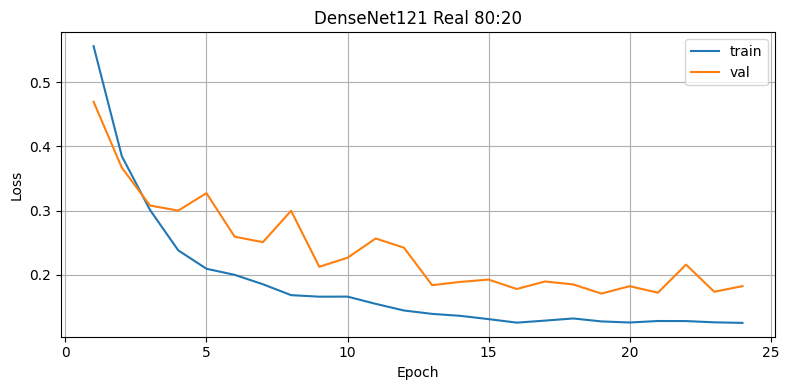

Saved: /content/drive/MyDrive/ModelOutputs/Model2/real_only/training/train_loss_20250907-143441.png


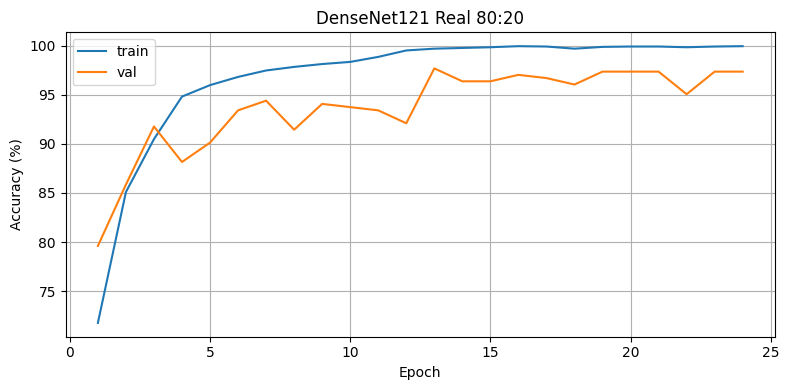

Saved: /content/drive/MyDrive/ModelOutputs/Model2/real_only/training/train_acc_20250907-143441.png


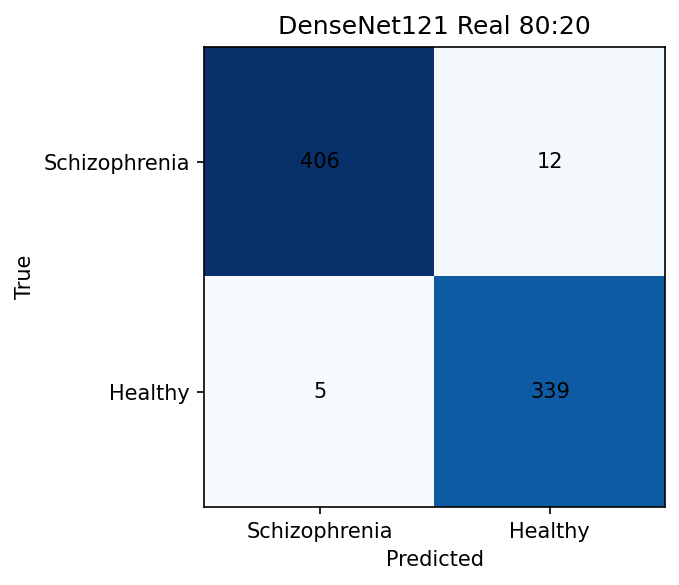

Saved: /content/drive/MyDrive/ModelOutputs/Model2/real_only/testing/confusion_matrix_20250907-143441.png
Saved: /content/drive/MyDrive/ModelOutputs/Model2/real_only/testing/test_predictions_20250907-143441.csv


In [ ]:
# METRICS AND PLOTS SHOW AND SAVE

# 1) Classification report: print and save
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np, pandas as pd, matplotlib.pyplot as plt

rep_txt = classification_report(
    y_true, y_pred, target_names=["Schizophrenia", "Healthy"], digits=4
)
print("\nClassification report\n")
print(rep_txt)

rep_df = pd.DataFrame(
    classification_report(
        y_true, y_pred, target_names=["Schizophrenia", "Healthy"], output_dict=True, digits=4
    )
).transpose()
rep_csv_path = os.path.join(TEST_DIR, f"classification_report_{ts}.csv")
rep_df.to_csv(rep_csv_path)
print("Saved:", rep_csv_path)

# 2) Generalized accuracy via bootstrap: print and save
def bootstrap_mean_acc(y_true, y_pred, iters=2000, seed=0):
    rng = np.random.default_rng(seed)
    y_true = np.array(y_true); y_pred = np.array(y_pred)
    n = len(y_true); idx = np.arange(n); accs = []
    for _ in range(iters):
        samp = rng.choice(idx, size=n, replace=True)
        accs.append((y_true[samp] == y_pred[samp]).mean())
    mean_acc = float(np.mean(accs))
    std_acc  = float(np.std(accs, ddof=1)) if len(accs) > 1 else 0.0
    ci_lo, ci_hi = float(np.percentile(accs, 2.5)), float(np.percentile(accs, 97.5))
    return mean_acc, std_acc, (ci_lo, ci_hi)

mean_acc, std_acc, (ci_lo, ci_hi) = bootstrap_mean_acc(y_true, y_pred)
print(f"\nGeneralized accuracy: {mean_acc:.3f} ± {std_acc:.3f}  95% CI [{ci_lo:.3f}, {ci_hi:.3f}]")

ga_path = os.path.join(TEST_DIR, f"generalized_accuracy_{ts}.txt")
with open(ga_path, "w") as f:
    f.write(f"mean_acc={mean_acc:.4f}, std={std_acc:.4f}, ci95=[{ci_lo:.4f},{ci_hi:.4f}]")
print("Saved:", ga_path)

# 3) Training curves: show and save
epochs_axis = np.array(hist["epoch"])
loss_png = os.path.join(TRAIN_DIR, f"train_loss_{ts}.png")
acc_png  = os.path.join(TRAIN_DIR, f"train_acc_{ts}.png")

plt.figure(figsize=(8,4))
plt.plot(epochs_axis, hist["train_loss"], label="train")
if "val_loss" in hist and len(hist["val_loss"]) and not np.isnan(np.array(hist["val_loss"])).all():
    plt.plot(epochs_axis, hist["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title(TITLE_STR); plt.grid(True); plt.legend()
plt.tight_layout(); plt.savefig(loss_png, dpi=150)
plt.show()
print("Saved:", loss_png)

plt.figure(figsize=(8,4))
plt.plot(epochs_axis, hist["train_acc"], label="train")
if "val_acc" in hist and len(hist["val_acc"]) and not np.isnan(np.array(hist["val_acc"])).all():
    plt.plot(epochs_axis, hist["val_acc"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.title(TITLE_STR); plt.grid(True); plt.legend()
plt.tight_layout(); plt.savefig(acc_png, dpi=150)
plt.show()
print("Saved:", acc_png)

# 4) Confusion matrix: show and save
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
plt.figure(figsize=(5,4), dpi=150)
plt.imshow(cm, cmap="Blues")
plt.title(TITLE_STR)
plt.xlabel("Predicted"); plt.ylabel("True")
plt.xticks([0,1], ["Schizophrenia","Healthy"])
plt.yticks([0,1], ["Schizophrenia","Healthy"])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.tight_layout()
cm_png = os.path.join(TEST_DIR, f"confusion_matrix_{ts}.png")
plt.savefig(cm_png, bbox_inches="tight", facecolor="white")
plt.show()
print("Saved:", cm_png)

# 5) Per-image predictions CSV: save
preds_csv = os.path.join(TEST_DIR, f"test_predictions_{ts}.csv")
pd.DataFrame({"path": img_paths, "true": y_true, "pred": y_pred, "prob_SZ": y_prob}) \
  .to_csv(preds_csv, index=False)
print("Saved:", preds_csv)
